In [12]:
from helper.trajectory import Trajectory
import numpy as np
import pickle

In [13]:
with open("../../dataset/dataframe-readins/full_traj_data.pkl", "rb") as f:
    test_traj_data = pickle.load(f)

## TRAJECTORY EXAMPLE PRODUCE


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_traj(df_single, save_path="report/images/trajectory.png"):
    """Plot 3D trajectory from a dataframe containing tx, ty, tz."""

    xs = df_single['tx'].to_numpy()
    ys = df_single['ty'].to_numpy()
    zs = df_single['tz'].to_numpy()

    fig = plt.figure(figsize=(4.5, 3.5))   # IEEE double-column width
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(xs, ys, zs, linewidth=2)

    # IEEE-friendly font sizes
    ax.set_xlabel('X Position', fontsize=10)
    ax.set_ylabel('Y Position', fontsize=10)
    ax.set_zlabel('Z Position', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

    plt.tight_layout()

    # Ensure directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save as high-res PNG
    fig.savefig(save_path, format="png", dpi=300, bbox_inches="tight")

    plt.show()
    plt.close(fig)  # Free memory if plotting repeatedly


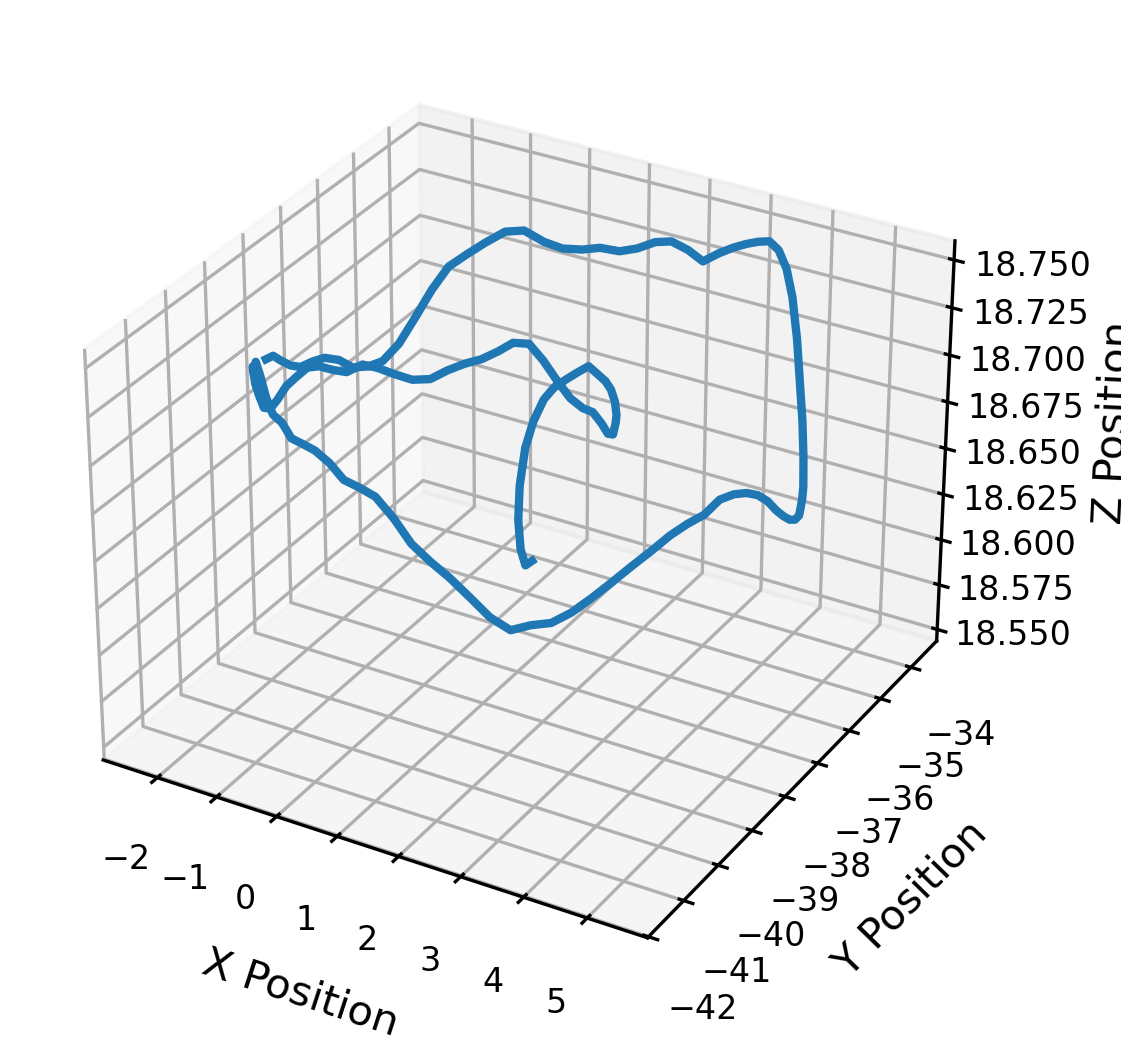

In [38]:
traj_no = 1
plot_traj(test_traj_data[traj_no], save_path="../report/images/trajectory_1.png")

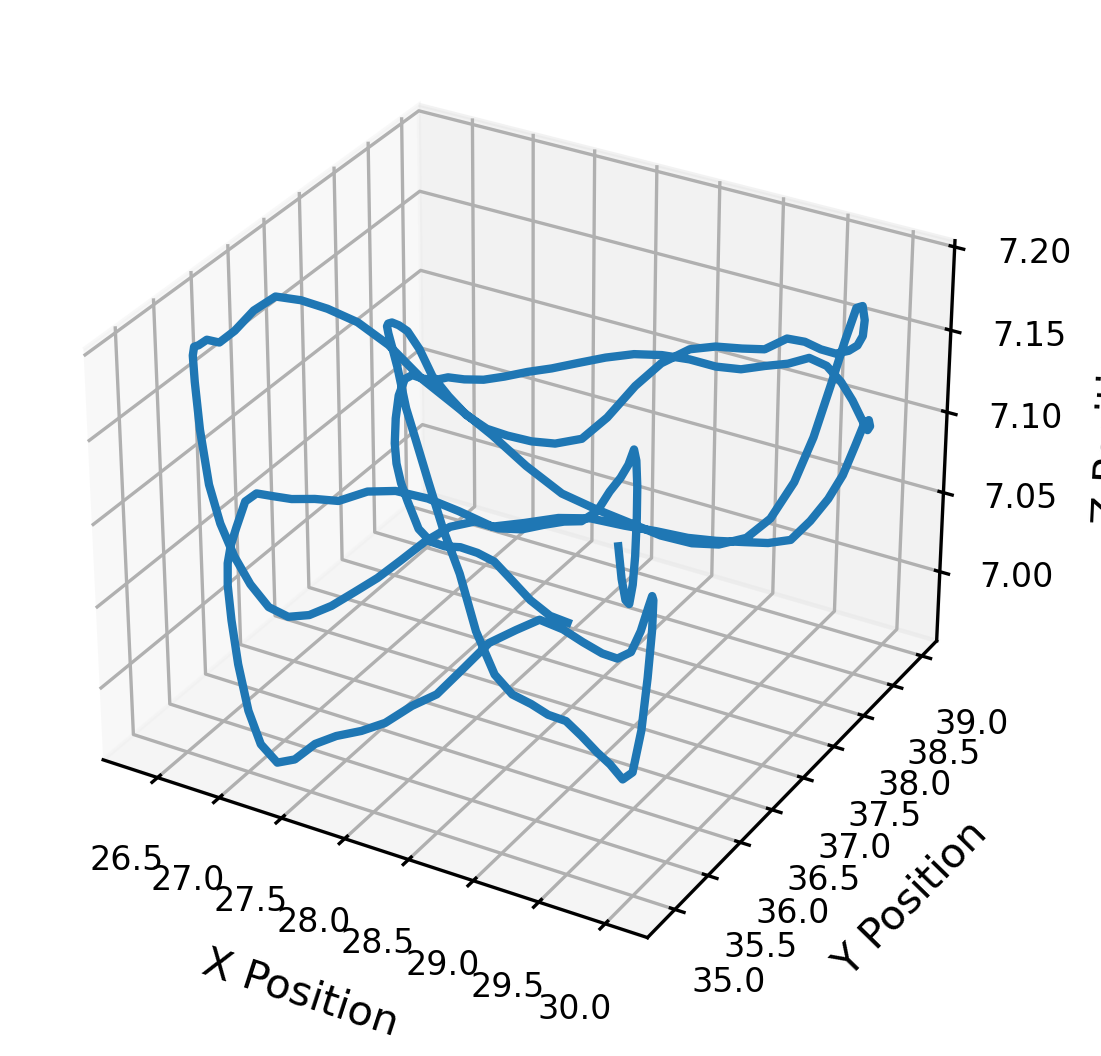

In [39]:
traj_no = 10
plot_traj(test_traj_data[traj_no], save_path="../report/images/trajectory_2.png")

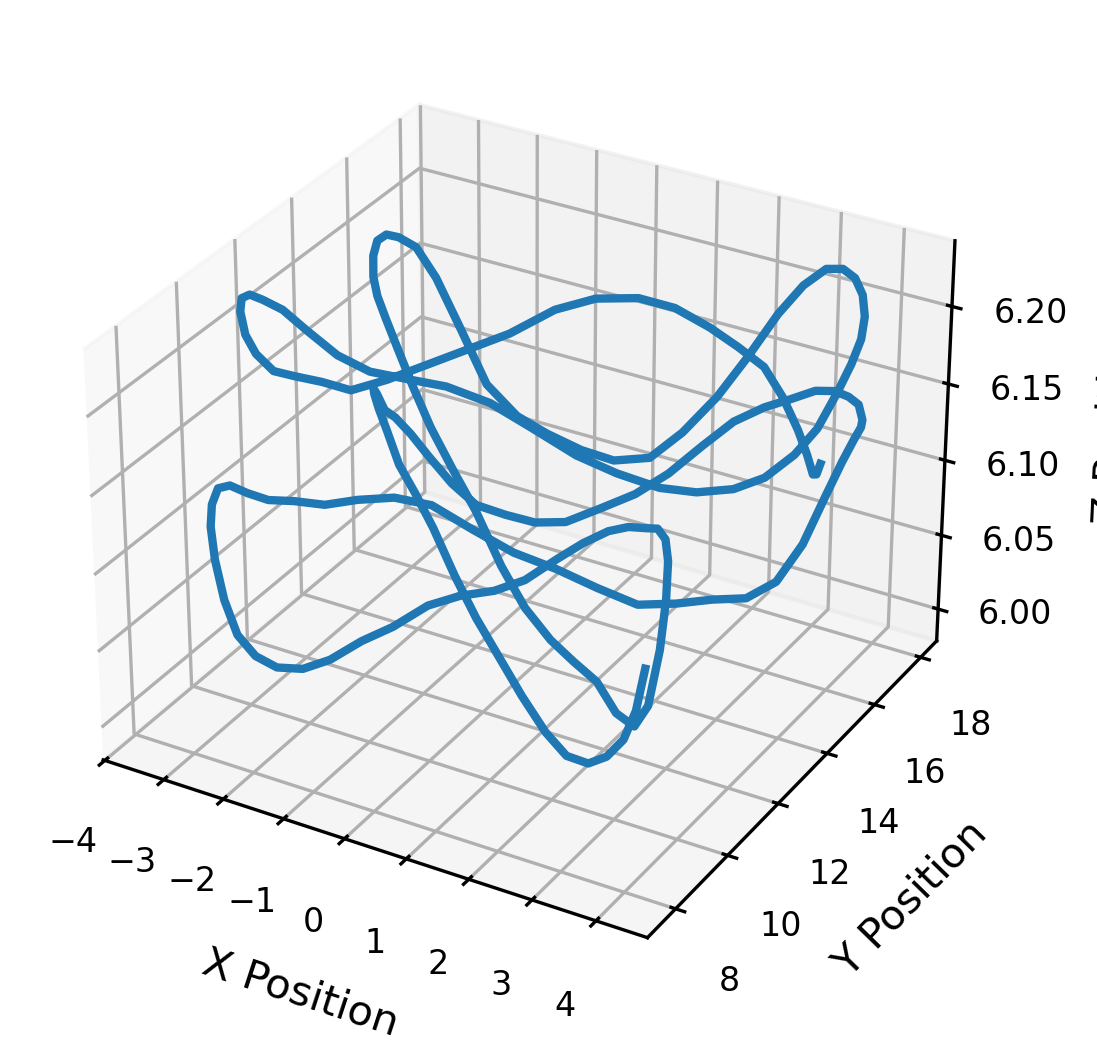

In [40]:
traj_no = 100
plot_traj(test_traj_data[traj_no], save_path="../report/images/trajectory_3.png")

## SAMPLE RATE VARIATION PRODUCE

In [18]:
def store_truth_data(aDF):
    truth_data = {}
    truth_data['timestamps'] = np.array(aDF['timestamp'])
    truth_data['x'] = np.array(aDF['tx'])
    truth_data['y'] = np.array(aDF['ty'])
    truth_data['z'] = np.array(aDF['tz'])
    truth_data['vx'] = np.array(aDF['vx'])
    truth_data['vy'] = np.array(aDF['vy'])
    truth_data['vz'] = np.array(aDF['vz'])
    return truth_data

In [19]:
# Measurement Simulation Inputs
moe = True 
traj_no = 1
test_traj_df = test_traj_data[traj_no]
truth_data = store_truth_data(test_traj_df)

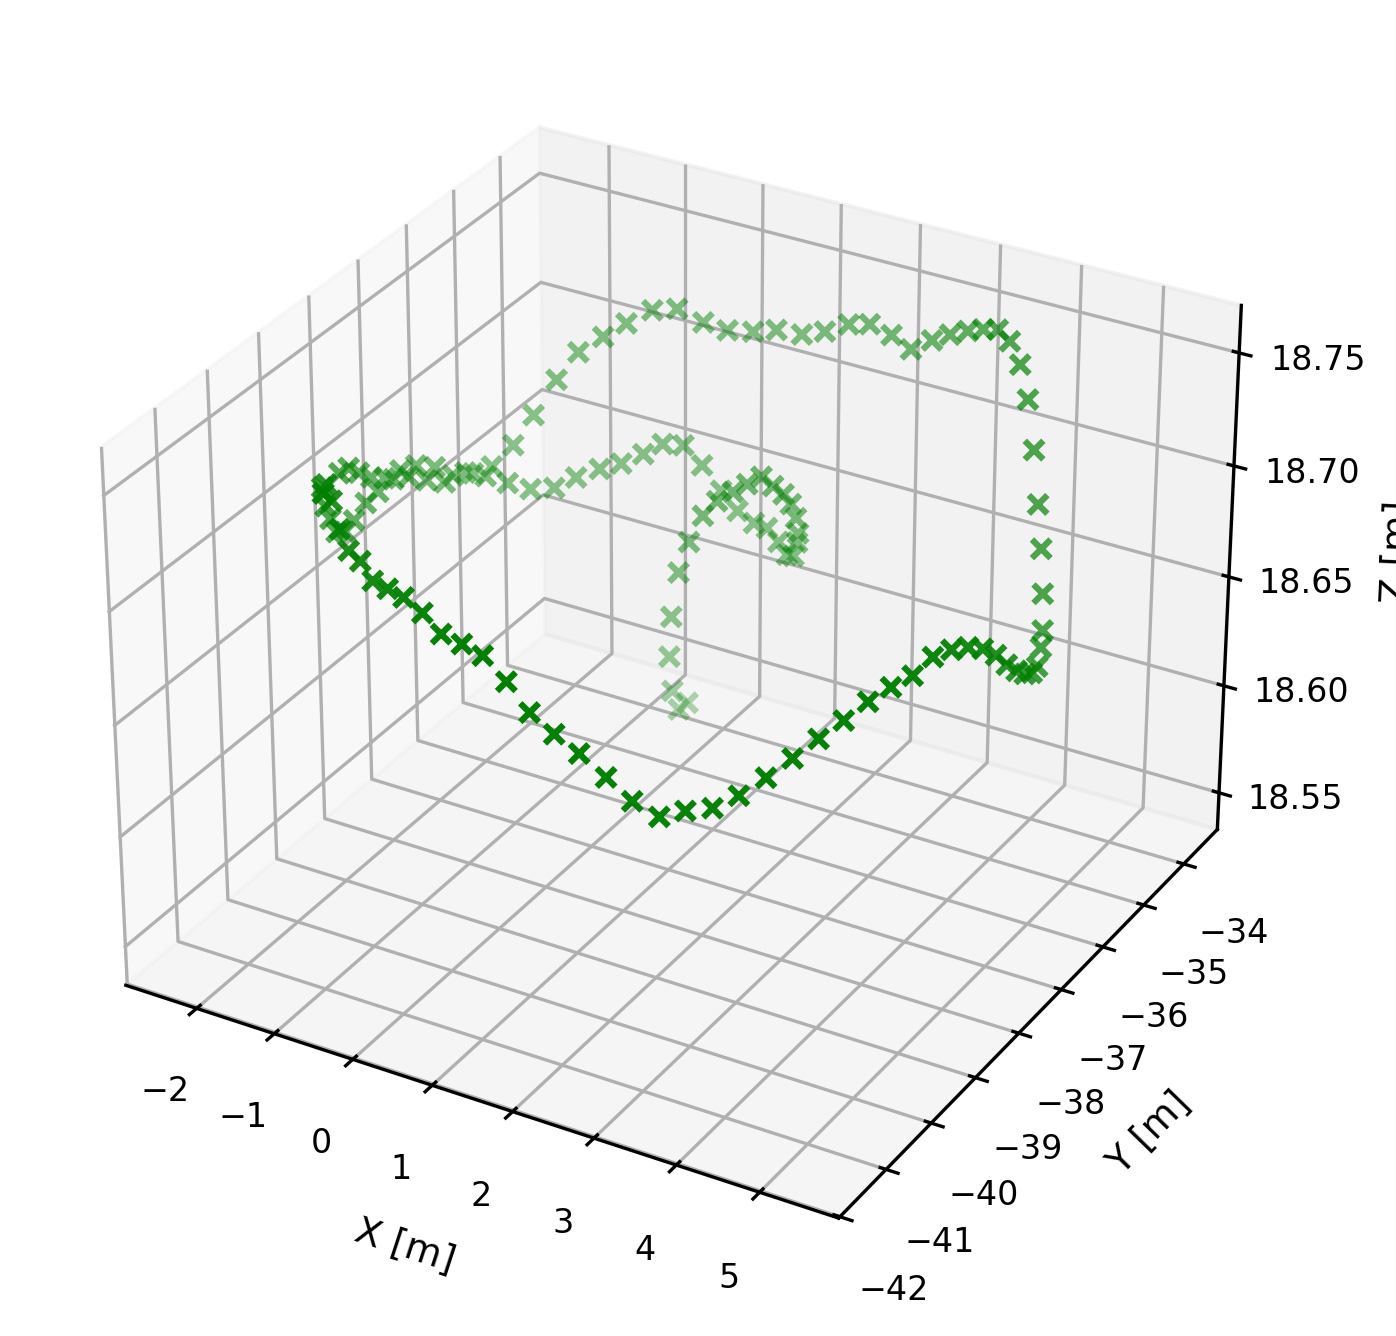

CPU times: total: 562 ms
Wall time: 658 ms


In [20]:
%%time
TestTraj = Trajectory(truth_data, 1, measurement_only_eval=moe)
TestTraj.apply_sampling_gaps(remove_pct=0)
TestTraj.visualize_3d_scatter(save_fig=True)

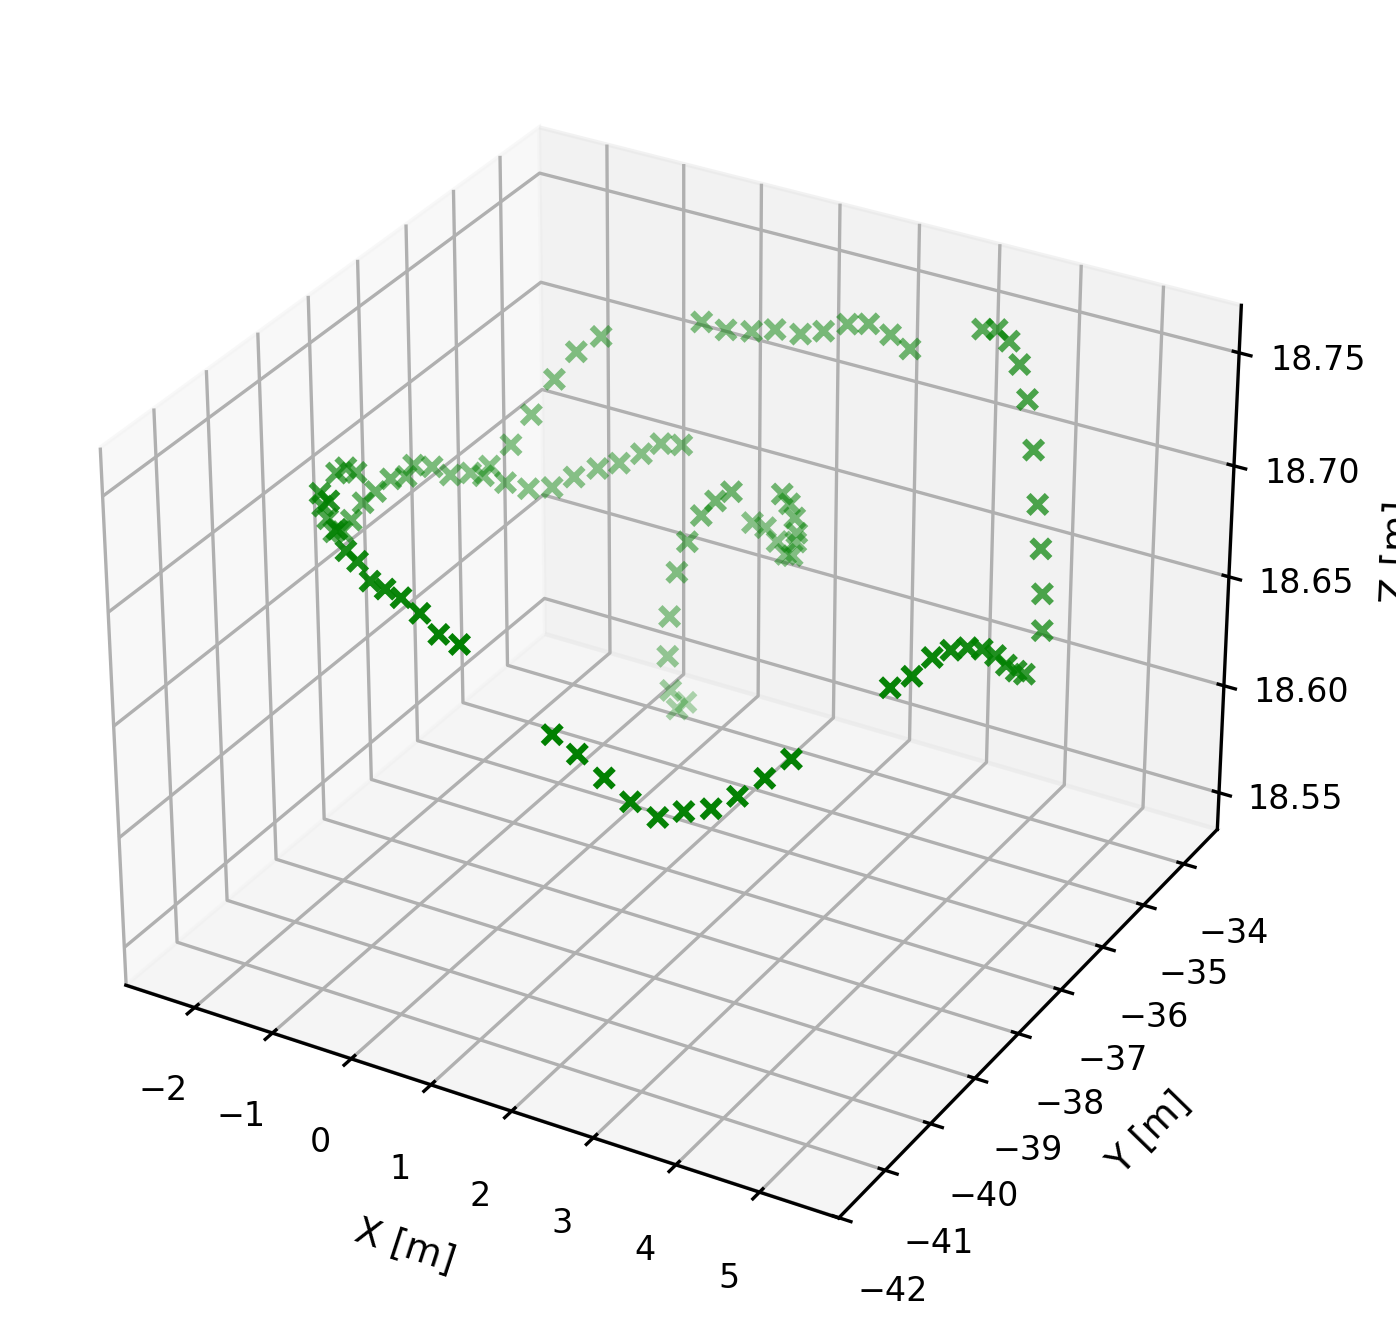

CPU times: total: 484 ms
Wall time: 679 ms


In [21]:
%%time
TestTraj = Trajectory(truth_data, 1, measurement_only_eval=moe)
TestTraj.apply_sampling_gaps(remove_pct=25)
TestTraj.visualize_3d_scatter(save_fig=True)

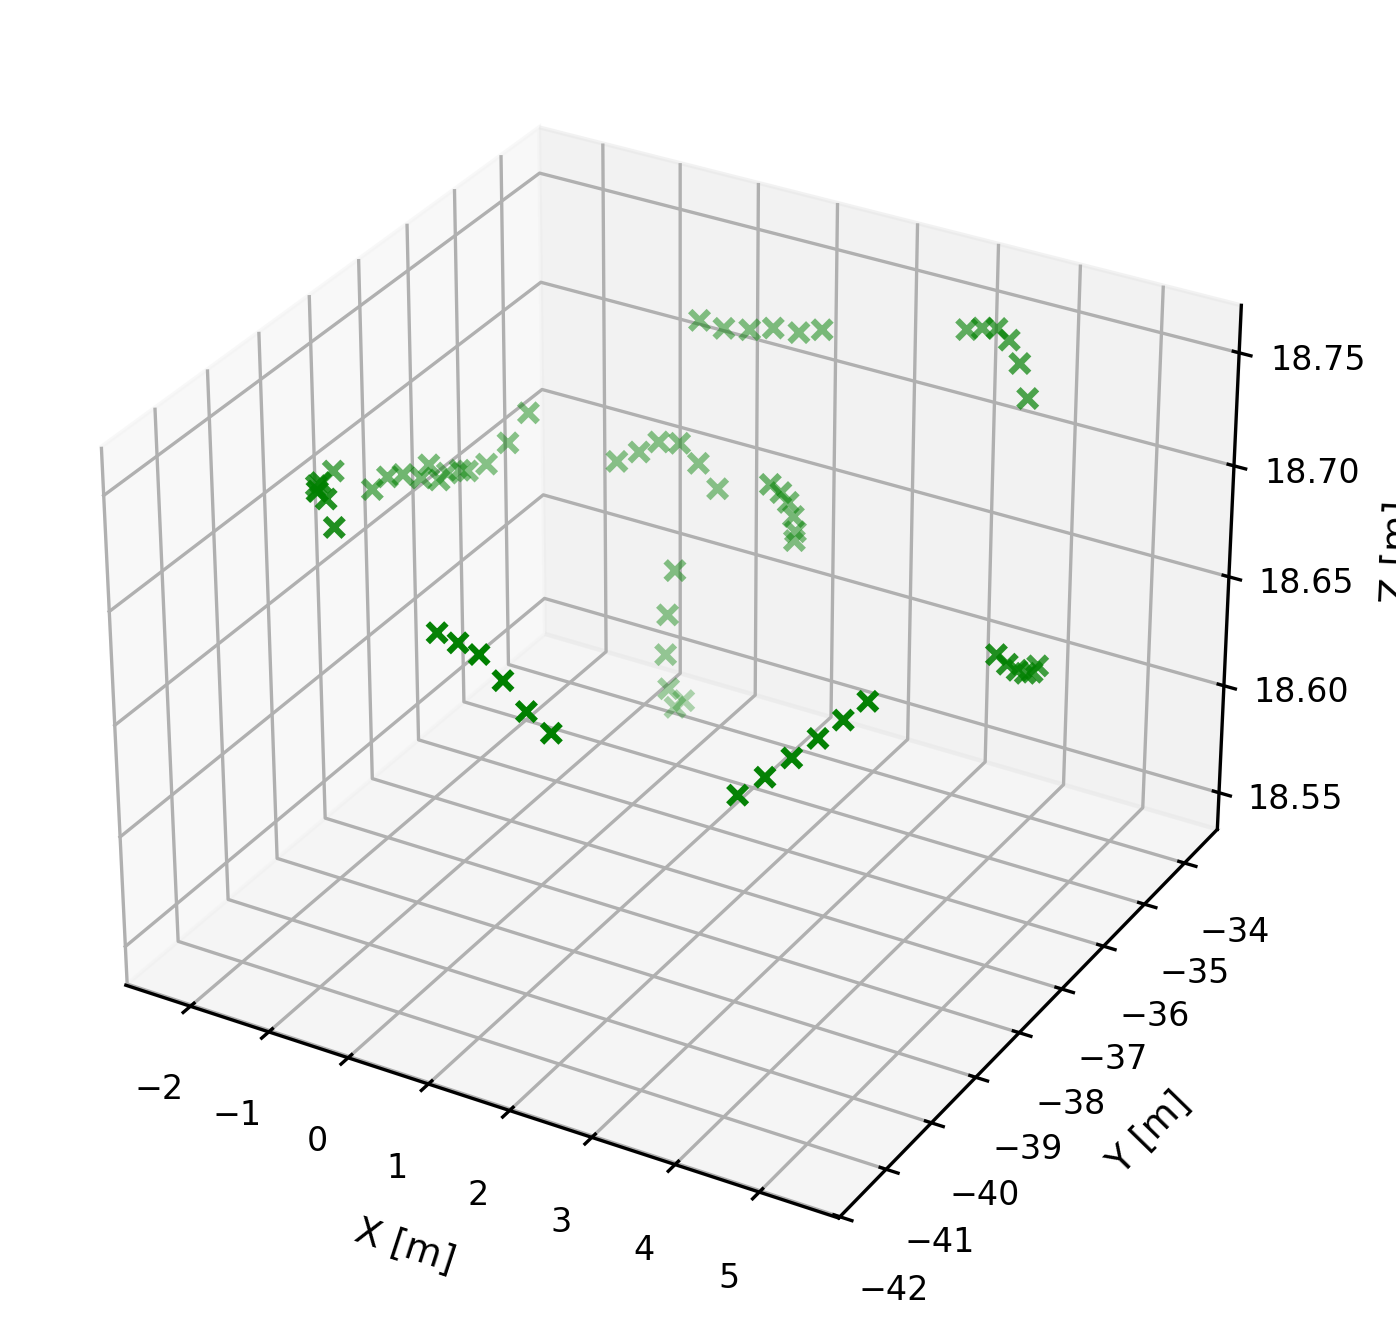

CPU times: total: 453 ms
Wall time: 599 ms


In [22]:
%%time
TestTraj = Trajectory(truth_data, 1, measurement_only_eval=moe)
TestTraj.apply_sampling_gaps(remove_pct=50)
TestTraj.visualize_3d_scatter(save_fig=True)